In [ ]:
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
np.random.seed(60)

male_heights = np.random.normal(loc=166, scale=5.5, size=1000)
female_heights = np.random.normal(loc=152, scale=4.5, size=1000)

male_train, male_test = train_test_split(male_heights, test_size=0.2, random_state=60, shuffle=True, stratify=None)
female_train, female_test = train_test_split(female_heights, test_size=0.2, random_state=60, shuffle=True, stratify=None)

male_mean, male_sd = np.mean(male_train), np.std(male_train)
female_mean, female_sd = np.mean(female_train), np.std(female_train)

def gender_height_classifier(male_data, female_data, male_mean, male_sd, female_mean, female_sd):
    male_misclassified = 0
    female_misclassified = 0

    for x in male_data:
        male_prob = norm.pdf(x, male_mean, male_sd)
        female_prob = norm.pdf(x, female_mean, female_sd)
        if male_prob < female_prob:
            male_misclassified += 1

    for x in female_data:
        male_prob = norm.pdf(x, male_mean, male_sd)
        female_prob = norm.pdf(x, female_mean, female_sd)
        if male_prob > female_prob:
            female_misclassified += 1

    total_samples = len(male_data) + len(female_data)
    total_misclassified = male_misclassified + female_misclassified
    accuracy = (1 - total_misclassified / total_samples) * 100

    return total_misclassified, accuracy

total_misclassifications_train, train_accuracy = gender_height_classifier(
    male_train, female_train, male_mean, male_sd, female_mean, female_sd
)

total_misclassifications_test, test_accuracy = gender_height_classifier(
    male_test, female_test, male_mean, male_sd, female_mean, female_sd
)
print(f"Total missclassifications from train data set: {total_misclassifications_train}")
print(f"Classification accuracy on train data set: {train_accuracy:.2f}%")

print(f"Total missclassifications from test data set: {total_misclassifications_test}")
print(f"Classification accuracy on test data set: {test_accuracy:.2f}%")


Total missclassifications from train data set: 126
Classification accuracy on train data set: 92.12%
Total missclassifications from test data set: 28
Classification accuracy on test data set: 93.00%


Female mean before change in heights: 151.65
Female standard deviation before change in heights: 4.56


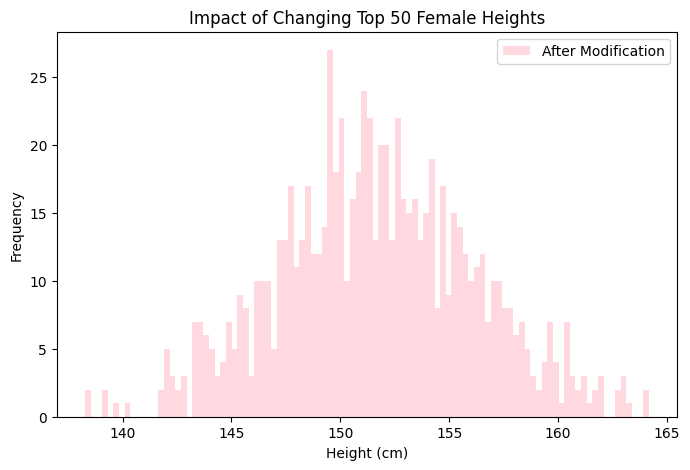

Female mean after change in heights: 152.28
Female standard deviation after change in heights: 6.16
Train Accuracy After Change: 91.5 %
Test Accuracy After Change: 92.0 %


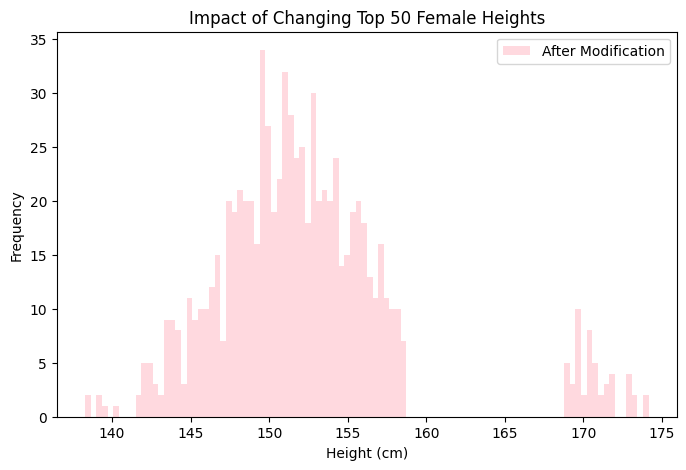

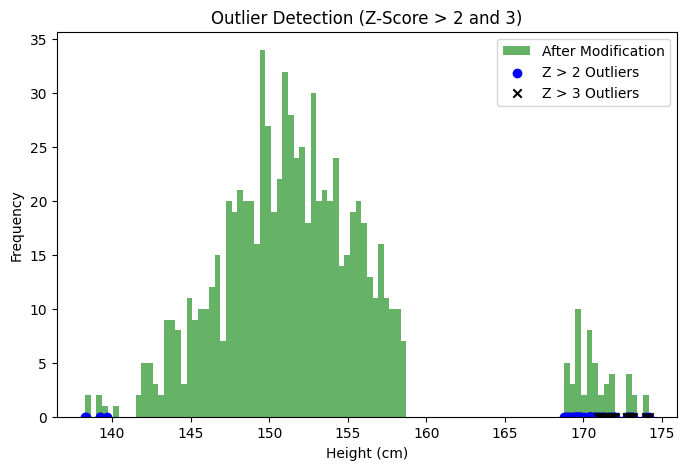

Female mean after outlier removal: 152.28
Female standard deviation after outlier removal: 6.16
Train Accuracy After Outlier Removal: 91.50 %
Test Accuracy After Outlier Removal: 92.00 %


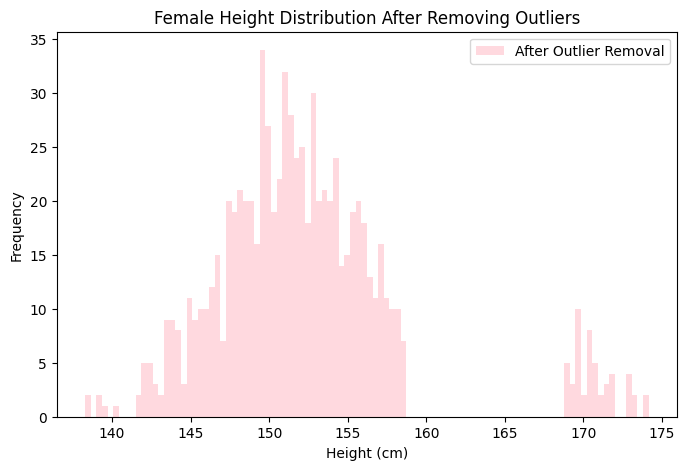

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

print(f"Female mean before change in heights: {female_mean:.2f}")
print(f"Female standard deviation before change in heights: {female_sd:.2f}")
plt.figure(figsize=(8, 5))
plt.hist(female_train, bins=100, alpha=0.6, label="After Modification", color="pink")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.title("Impact of Changing Top 50 Female Heights")
plt.legend()
plt.show()

female_train_series = pd.Series(female_train)
top_50_female_indices = np.argsort(female_train_series)[-50:]
female_train_changed = female_train_series.to_numpy()
female_train_changed[top_50_female_indices] += 10

female_mean_changed, female_sd_changed = np.mean(female_train_changed), np.std(female_train_changed)
print(f"Female mean after change in heights: {female_mean_changed:.2f}")
print(f"Female standard deviation after change in heights: {female_sd_changed:.2f}")


total_miss_train_changed, train_accuracy_changed = gender_height_classifier(
    male_train, female_train_changed, np.mean(male_train), np.std(male_train), female_mean_changed, female_sd_changed
)

total_miss_test_changed, test_accuracy_changed = gender_height_classifier(
    male_test, female_test, np.mean(male_train), np.std(male_train), female_mean_changed, female_sd_changed
)

print("Train Accuracy After Change:", train_accuracy_changed, "%")
print("Test Accuracy After Change:", test_accuracy_changed, "%")

# Plot histogram of modified female heights
plt.figure(figsize=(8, 5))
plt.hist(female_train_changed, bins=100, alpha=0.6, label="After Modification", color="pink")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.title("Impact of Changing Top 50 Female Heights")
plt.legend()
plt.show()

# Outlier detection using Z-score
z_scores = zscore(female_train_changed, nan_policy='propagate')
z_2_outliers = female_train_changed[abs(z_scores) > 2]
z_3_outliers = female_train_changed[abs(z_scores) > 3]

# Plot histogram with outliers
plt.figure(figsize=(8, 5))
plt.hist(female_train_changed, bins=100, alpha=0.6, color="green", label="After Modification")
plt.scatter(z_2_outliers, np.zeros_like(z_2_outliers), color='blue', label="Z > 2 Outliers", marker='o')
plt.scatter(z_3_outliers, np.zeros_like(z_3_outliers), color='black', label="Z > 3 Outliers", marker='x')
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.title("Outlier Detection (Z-Score > 2 and 3)")
plt.legend()
plt.show()

# Remove outliers with Z-score > 3
female_train_cleaned = female_train_changed[abs(z_scores) <= 4]
female_mean_cleaned, female_sd_cleaned = np.mean(female_train_cleaned), np.std(female_train_cleaned)

print(f"Female mean after outlier removal: {female_mean_cleaned:.2f}")
print(f"Female standard deviation after outlier removal: {female_sd_cleaned:.2f}")

# Recalculate classification after outlier removal
total_miss_train_cleaned, train_accuracy_cleaned = gender_height_classifier(
    male_train, female_train_cleaned, np.mean(male_train), np.std(male_train), female_mean_cleaned, female_sd_cleaned
)

total_miss_test_cleaned, test_accuracy_cleaned = gender_height_classifier(
    male_test, female_test, np.mean(male_train), np.std(male_train), female_mean_cleaned, female_sd_cleaned
)

print(f"Train Accuracy After Outlier Removal: {train_accuracy_cleaned:.2f} %")
print(f"Test Accuracy After Outlier Removal: {test_accuracy_cleaned:.2f} %")

# Plot histogram after outlier removal
plt.figure(figsize=(8, 5))
plt.hist(female_train_cleaned, bins=100, alpha=0.6, color="pink", label="After Outlier Removal")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.title("Female Height Distribution After Removing Outliers")
plt.legend()
plt.show()


Train Accuracy (including outliers): 91.5 %
Test Accuracy (including outliers): 92.0 %

 Trimming Impact on Classification Accuracy:

Trim %     Impact on Accuracy  


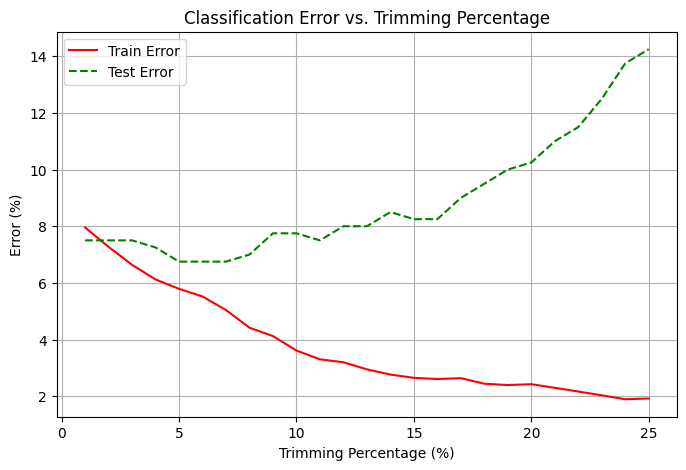

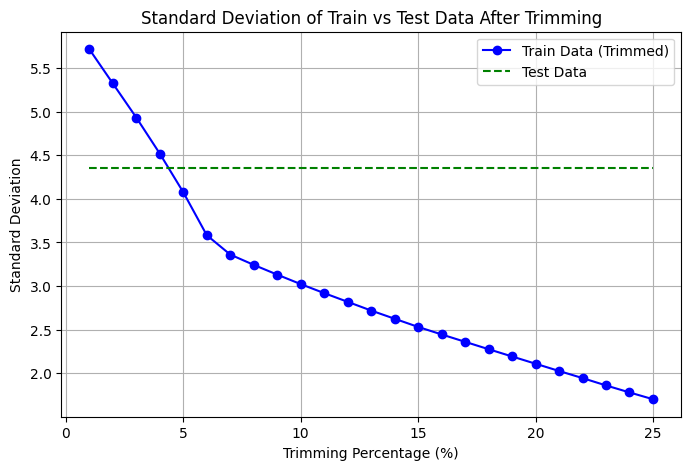

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("Train Accuracy (including outliers):", train_accuracy_changed, "%")
print("Test Accuracy (including outliers):", test_accuracy_changed, "%")

trim_percentages = list(range(1, 26))
std_dev_trimmed = []
std_dev_test_after = []
train_errors = []
test_errors = []

for k in trim_percentages:
    num_to_trim = int(len(female_train_changed) * (k / 100))
    female_train_trimmed = np.sort(female_train_changed)[num_to_trim:-num_to_trim]

    female_mean_trimmed = np.mean(female_train_trimmed)
    female_sd_trimmed = np.std(female_train_trimmed)

    std_dev_trimmed.append(female_sd_trimmed)
    std_dev_test_after.append(np.std(female_test))

    _, train_accuracy_trimmed = gender_height_classifier(
        male_train, female_train_trimmed,
        np.mean(male_train), np.std(male_train),
        female_mean_trimmed, female_sd_trimmed
    )

    _, test_accuracy_trimmed = gender_height_classifier(
        male_test, female_test,
        np.mean(male_train), np.std(male_train),
        female_mean_trimmed, female_sd_trimmed
    )

    train_errors.append(100 - train_accuracy_trimmed)
    test_errors.append(100 - test_accuracy_trimmed)

print("\n Trimming Impact on Classification Accuracy:\n")
print("Trim %".ljust(10), "Impact on Accuracy".ljust(20))



plt.figure(figsize=(8, 5))
plt.plot(trim_percentages, train_errors, label="Train Error", color='red')
plt.plot(trim_percentages, test_errors, label="Test Error", linestyle='--', color='green')

plt.xlabel("Trimming Percentage (%)")
plt.ylabel("Error (%)")
plt.title("Classification Error vs. Trimming Percentage")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(trim_percentages, std_dev_trimmed, label="Train Data (Trimmed)", marker='o', color='blue')
plt.plot(trim_percentages, std_dev_test_after, label="Test Data", linestyle='--', color='green')

plt.xlabel("Trimming Percentage (%)")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of Train vs Test Data After Trimming")
plt.legend()
plt.grid(True)
plt.show()


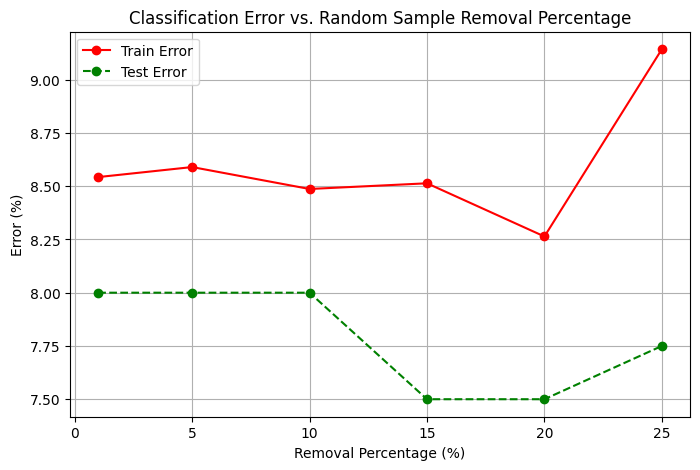

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

removal_percentages = [1, 5, 10, 15, 20, 25]
train_errors = []
test_errors = []

for removal_percentage in removal_percentages:
    num_to_remove = int(len(female_train) * (removal_percentage / 100))
    female_train_removed = np.delete(female_train, random.sample(range(len(female_train)), num_to_remove))

    female_mean_removed = np.mean(female_train_removed)
    female_sd_removed = np.std(female_train_removed)

    _, train_accuracy_removed = gender_height_classifier(male_train, female_train_removed, np.mean(male_train), np.std(male_train), female_mean_removed, female_sd_removed)
    _, test_accuracy_removed = gender_height_classifier(male_test, female_test, np.mean(male_train), np.std(male_train), female_mean_removed, female_sd_removed)

    train_errors.append(100 - train_accuracy_removed)
    test_errors.append(100 - test_accuracy_removed)

plt.figure(figsize=(8, 5))
plt.plot(removal_percentages, train_errors, label="Train Error", color='red', marker='o')
plt.plot(removal_percentages, test_errors, label="Test Error", linestyle='--', color='green', marker='o')

plt.xlabel("Removal Percentage (%)")
plt.ylabel("Error (%)")
plt.title("Classification Error vs. Random Sample Removal Percentage")
plt.legend()
plt.grid(True)
plt.show()
